# Représentation d'une image

Vous avez étudié différentes façon de manipuler des données avec Python. Nous allons étudier quelques applications de vos connaissances à la manipulation d'image. Pour cela étudions comment est traitée l'information stockée dans une image dans un programme informatique.

Les lignes de commandes suivantes permettent : d'importer les librairies numpy, matplotlib et imageio, et d'enregistrer et afficher une image au format .bmp se trouvant dans le même fichier que ce script.

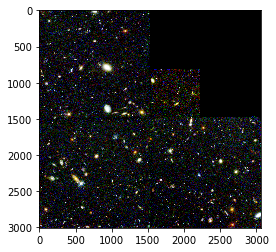

In [17]:
from pylab import *
from imageio import *
image = imread('hubble.bmp')
imshow(image)

L'image étant stockée dans "image" observons les différentes propriétés de "image".

In [2]:
print(type(image))
print(image.shape)

<class 'imageio.core.util.Array'>
(3006, 3069, 3)


Il s'agit donc d'un tableau de dimension 3006 $\times$ 3069 contenant dans chaque case du tableau 3 éléments. Les nombres 3006 et 3069 correspondent au nombre de ligne et de colonne de pixels. On peut ensuite afficher les informations d'un pixel.

In [3]:
print(image[1264][236])

[51 19  0]


On remarque qu'il s'agit de 3 nombres entiers, qui représentent les trois niveaux de couleurs RGB (rouge, vert, bleu) des pixels affichés par l'écran. Ces nombres sont compris entre 0 et 255, les niveaux de chaque couleurs sont donc encodés sur un octet.

Pour savoir quelle couleur est représentée par un nombre, on peut définir plusieurs tableau d'un seul pixel de base et représenter l'image obtenue.

In [4]:
noir = array([[[0,0,0]]])
rouge=array([[[255,0,0]]])
vert=array([[[0,255,0]]])
bleu=array([[[0,0,255]]])
blanc=array([[[255,255,255]]])

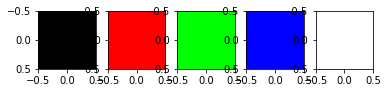

In [5]:
subplot(151)
imshow(noir)
subplot(152)
imshow(rouge)
subplot(153)
imshow(vert)
subplot(154)
imshow(bleu)
subplot(155)
imshow(blanc)

Si on veut seuleument afficher des nuances de gris, il faut que les trois niveaux RGB soient égaux.

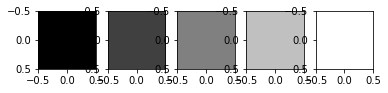

In [6]:
noir = array([[[0,0,0]]])
gris_fonce=array([[[64,64,64]]])
gris=array([[[128,128,128]]])
gris_clair=array([[[192,192,192]]])
blanc=array([[[255,255,255]]])

subplot(151)
imshow(noir)
subplot(152)
imshow(gris_fonce)
subplot(153)
imshow(gris)
subplot(154)
imshow(gris_clair)
subplot(155)
imshow(blanc)

Si on veut afficher n'importe quelle autre couleur, il suffit d'ajuster les niveaux de chaque couleurs.

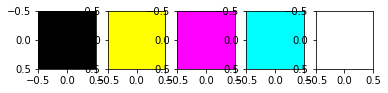

In [7]:
noir = array([[[0,0,0]]])
jaune=array([[[255,255,0]]])
magenta=array([[[255,0,255]]])
cyan=array([[[0,255,255]]])
blanc=array([[[255,255,255]]])

subplot(151)
imshow(noir)
subplot(152)
imshow(jaune)
subplot(153)
imshow(magenta)
subplot(154)
imshow(cyan)
subplot(155)
imshow(blanc)

## exercice :

- essayer de représenter les 5 couleurs des anneaux olympiques.

Pour construire des formes géométriques on doit travailler avec les deux premiers indices du tableau image. Un moyen efficace pour affecter une même opération à un groupe d'indice est d'utiliser des masques.

Un masque est constitué à partir de tableaux d'indices sur lesquels on effectue une opération booléenne. Construisons par exemple le masque d'un disque. Comme le test d'un rayon plus petit que le tiers du nombre de pixel par rapport au centre de l'image.

In [8]:
N = 10
x = range(N)
y = range(N)
X, Y = meshgrid(x,y)
masque = ((X-N//2+0.5)**2+(Y-N//2+0.5)**2)<(N//3)**2
print(masque)

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False  True  True  True  True False False False]
 [False False  True  True  True  True  True  True False False]
 [False False  True  True  True  True  True  True False False]
 [False False  True  True  True  True  True  True False False]
 [False False  True  True  True  True  True  True False False]
 [False False False  True  True  True  True False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


On peut alors affecter une même valeur à tous les pixels correspondant à une valeur True du masque, simplement en utilisant le masque comme indice de l'image.

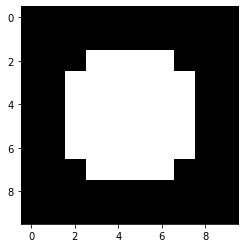

In [9]:
Nx, Ny = masque.shape
disque = zeros([Nx, Ny, 3]).astype('int')
disque[masque,:] = 255
imshow(disque)

On peut ainsi augmenter la résolution spatiale, en augmentant le nombre de pixel.

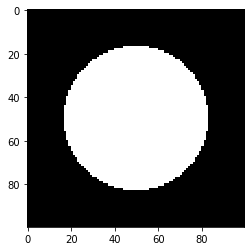

In [10]:
N = 100
x = range(N)
y = range(N)
X, Y = meshgrid(x,y)
masque = ((X-N//2+0.5)**2+(Y-N//2+0.5)**2)<(N//3)**2
Nx, Ny = masque.shape
disque = zeros([Nx, Ny, 3]).astype('int')
disque[masque,:] = 255
imshow(disque)

## exercice :

- dessinez le drapeau olympique à l'aide de différents masques.

# Modification d'image par modification de ses indices

Un premier type de transformation d'image consiste à déplacer les différents pixels qui la compose. Modifier l'emplacement des pixels consiste à modifier leurs indices.

Prenons un exemple de fonction réalisant une symétrie verticale d'une image.

In [11]:
def symetrie_verticale(image):
    Nx, Ny, n = image.shape
    resultat = zeros([Nx, Ny, n]).astype('int')
    resultat[:,:,:] = image[::-1,:,:]
    return resultat

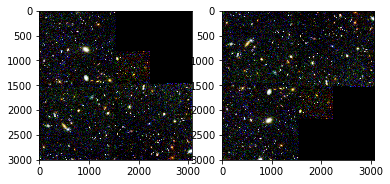

In [12]:
subplot(121)
imshow(image)
subplot(122)
imshow(symetrie_verticale(image))

## exercice :

- écrire une fonction qui retourne le symétrique d'une image par rapport à l'horizontale.

 - écrire une fonction qui réalise la rotation d'un quart de tour dans le sens horaire d'une image

 - écrire une fonction qui réalise la rotation d'un quart de tour dans le sens anti-horaire d'une image

Les modifications ci-dessus replacent toujours un pixel à la place d'un autre pixel. D'autres type de transformation demande de créer ou supprimer de nouvelles positions pour les pixels. On dit alors qu'on fait une interpolation des pixels.

Une technique d'interpolation consiste à utiliser une méthode dite du plus proche voisin.
Si on souhaite déplacer les pixels d'une image sur des grilles d'indice X et Y, on construit les nouvelles grilles X_prime et Y_prime d'indices contenant les points les plus proches de X et Y. Ceci dans la limite du nombre total de pixel dans l'image.

La fonction ci-dessous retourne une image interpolée

In [13]:
def interpolation(image,X,Y):
    Nx,Ny,n = image.shape
    X_prime = minimum(Nx-1,maximum(0,floor(X+0.5))).astype('int')
    Y_prime = minimum(Ny-1,maximum(0,floor(Y+0.5))).astype('int')
    nx, ny = X.shape
    resultat = zeros([Ny,Nx,n]).astype('int')
    for i in range(n):
        resultat[:,:,i] = image[X_prime,Y_prime,i].reshape(X.shape)
    return resultat

On peut donc l'utiliser pour faire un zoom par exemple:

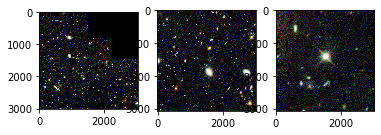

In [14]:
Nx, Ny, n = image.shape
x = range(Nx)
y = range(Ny)
X_initial, Y_initial = meshgrid(x,y)
X, Y = 0.2*X_initial, 0.2*Y_initial
subplot(131)
imshow(image)
subplot(132)
X, Y = 0.5*X_initial, 0.5*Y_initial
imshow(interpolation(image,X,Y))
subplot(133)
X, Y = 0.1*X_initial, 0.1*Y_initial
imshow(interpolation(image,X,Y))

## exercice :

- écrire une fonction qui réalise une rotation d'un angle quelconque d'une image

Ainsi en écrivant une fonction qui transforme les tableaux d'indices X et Y, on peut déformer une image comme on le souhaite.

# Modification d'une image par modification des niveaux RGB

Un autre type de traitement d'image ne consiste plus à déplacer les pixels mais à modifier leurs valeurs. On ne manipule donc plus les indices du tableau mais les valeurs prises par les 3 niveaux RGB.

Un premier type de traitement consiste à effectuer des filtres colorés qui n'affichent que les niveaux de rouge, vert ou bleu d'une image en affectant à zéro les autres couleurs.

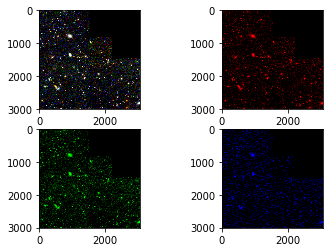

In [15]:
def filtre_rouge(image):
    Nx,Ny,n = image.shape
    resultat = zeros([Nx,Ny,n]).astype('int')
    resultat[:,:,0] = image[:,:,0]
    return resultat

def filtre_vert(image):
    Nx,Ny,n = image.shape
    resultat = zeros([Nx,Ny,n]).astype('int')
    resultat[:,:,1] = image[:,:,1]
    return resultat

def filtre_bleu(image):
    Nx,Ny,n = image.shape
    resultat = zeros([Nx,Ny,n]).astype('int')
    resultat[:,:,2] = image[:,:,2]
    return resultat

subplot(221)
imshow(image)
subplot(222)
imshow(filtre_rouge(image))
subplot(223)
imshow(filtre_vert(image))
subplot(224)
imshow(filtre_bleu(image))

# exercice :

- Une autre traitement consiste à transformer une image couleur en image noir et blanc. Comme nous ne persevons pas à l'oeil avec la même intensité les différents niveaux RGB, le niveaux de gris N est obtenu comme une moyenne pondérée des trois autres niveaux : $N = \dfrac{aR + bG + cB}{a+b+c}$. Ecrire une fonction qui prend en argument ue image ainsi que les trois coefficients de conversion (a,b,c) et retourne une image en niveaux de gris.

- Tester votre fonction pour les valeurs de coefficient $a = 0.2126$, $b = 0.7152$, et  $c = 0.0722$

Une fois que notre image est convertie en niveaux de gris, on peut même aller plus loin et la convertir en image noir et blanc, par effet dit de seuillage. Cette opération consiste à affecter les niveaux 0 ou 255 à un pixel de l'image selon que son niveau de gris soit inférieur ou supérieur à un seuil s.

On peut remarquer notamment que les filtres de couleurs sont des conversions en niveaux de gris de coefficients de type (1, 0, 0), on peut donc écrire une fonction de seuillage à partir d'un de ces filtres. On remarque aussi que l'on cherche à affecter une même valeur un grand nombre de pixel, on va donc utiliser une technique de masque pour effectuer le seuillage.

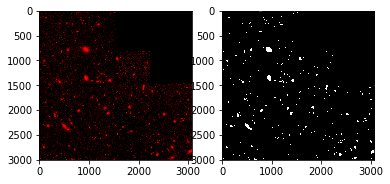

In [16]:
def seuil_rouge(image,s):
    Nx,Ny,n = image.shape
    resultat = zeros([Nx,Ny,n]).astype('int')
    masque = image[:,:,0] > s
    resultat[masque,:] = 255 
    return resultat

subplot(121)
imshow(filtre_rouge(image))
subplot(122)
imshow(seuil_rouge(image,128))

# exercice:

- écrire une fonction de seuillage qui prend en argument une image, des coefficients de conversion en niveaux de gris (a,b,c), et un seuil (s)

- Tester votre fonction de seuillage

En convertissant une image de niveaux de gris à une image en noir et blanc, on remarque que l'on a convertit chaque pixel d'image encodé initialement sur 256 niveaux de quantification, à un pixel encodé sur 2 niveaux 0 et 255, seuleument. On a donc diminué le nombre de bits sur lequel est encodé l'information de 8 (un octet) à un seul bit.

- écrire une fonction qui prend en argument une image, des coefficients de conversion en niveaux de gris (a,b,c) et un nombre de bit $1 \leq n \leq 8$ et qui retourne une image en niveaux de gris encodé sur n bits. Puis tester votre fonction.

Lorsque nous avons utilisé la fonction de seuillage sur le filtre rouge, nous avons remarqué que les objets rouges apparaissent plus clairement à l'image. En effet nous avons augmenté le contraste de l'image en exploitant l'ensemble des niveaux de l'image de 0 à 255. On peut donc ajuster le contraste d'une image en jouant directement sur le calibre des niveaux de gris. C'est-à-dire que l'on fixe les bornes du calibre à (Nmin, Nmax), puis on ajuste les valeurs de niveaux de gris N de chaque pixel tel que:
- si N < Nmin alors N $\leftarrow$ 0,
- si Nmin < N < Nmax alors N $\leftarrow$ $\dfrac{N - Nmin}{Nmax - Nmin}$
- si Nmax < N alors N $\leftarrow$ 255

- écrire une fonction qui prend en argument une image, des coefficients de conversion en niveaux de gris (a,b,c) et les bornes du calibre (Nmin, Nmax). Tester votre fonction.

On remarque que cette fonction de changement de calibre peut servir à augmenter le contraste, mais selon le réglage du calibre elle peut servir aussi à éclaircir ou assombrir l'image. On peut aussi utiliser des transformations non linéaire pour modifier le rendu d'une image.

# Modification d'une image par convolution

Dans les traitements d'image proposés dans la partie précédente, on ne modifie les valeurs des niveaux RGB de chaque image en ne considérant les pixels que un à un. Une autre stratégie consiste à modifier chaque pixel en prenant en compte les niveaux des pixels voisins.

Ce type d'opération peut-être réalisé par des méthodes de produit de convolution. Pour décrire une opération de convolution, on donne une matrice appelée noyau de convolution de type :

$$C = \left(\begin{array}{ccc}
c_{11} & c_{12} & c_{13} \\
c_{21} & c_{22} & c_{23} \\
c_{31} & c_{32} & c_{33} 
\end{array}\right)$$

Et le produit de convolution consiste à remplacer chaque niveau de gris $N[i,j]$ du pixel en $(i,j)$ par le niveau de gris

$c_{11}N[i-1,j-1]+c_{12}N[i-1,j]+c_{13}N[i-1,j+1]$

$+c_{21}N[i,j-1]+c_{22}N[i,j]+c_{23}N[i-,j+1]$

$+c_{31}N[i+1,j-1]+c_{32}N[i+1,j]+c_{33}N[i+1,j+1]$

Les coefficients du noyau de convolution sont donc les pondérations prises en compte pour le calcul du nouveau niveau de gris en fonction de la valeur initiale du pixel initial ou voisin. Le coefficient central de la matrice de convolution est toujours le coefficient du pixel initial et les coefficients voisins correspondent aux voisins du pixel initial.

On en déduit donc qu'il faut toujours prendre un noyau de convolution de dimension impaire pour qu'il y ait un coefficient central.

## exercice :

- écrire une fonction qui prend en argument une image en niveau de gris et un noyau de convolution et retourne l'image obtenue après le produit de convolution par le noyau.

On donne quelques exemples de noyaux de convolution que vous pouvez tester

Un noyau de floutage :

$$C = \dfrac{1}{9}\left(\begin{array}{ccc}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{array}\right)$$

Un noyau de détection de contour :

$$C = \left(\begin{array}{ccc}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0 
\end{array}\right)$$

Un noyau de filtrage :

$$C = \dfrac{1}{16}\left(\begin{array}{ccc}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 
\end{array}\right)$$

Un noyau de relief :

$$C = \left(\begin{array}{ccc}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2 
\end{array}\right)$$